### Versão para teste do Random Forest

In [3]:
import os
import sys
from sklearn.ensemble import RandomForestClassifier
import joblib
from sklearn.model_selection import GridSearchCV


# Adicionando o diretório-raiz do projeto ao sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.features.data_process import x_test, x_train, y_binary_test, y_binary_train

In [5]:
# Primeiro teste com parâmetros padrões
random_forest_v1 = RandomForestClassifier()

random_forest_v1.fit(x_train, y_binary_train)

caminho_v1 = '../models/ramdon_forest_v1.pkl'
joblib.dump(random_forest_v1, caminho_v1)

print(f"Caminho salvo em: {caminho_v1}")

Caminho salvo em: ../models/ramdon_forest_v1.pkl


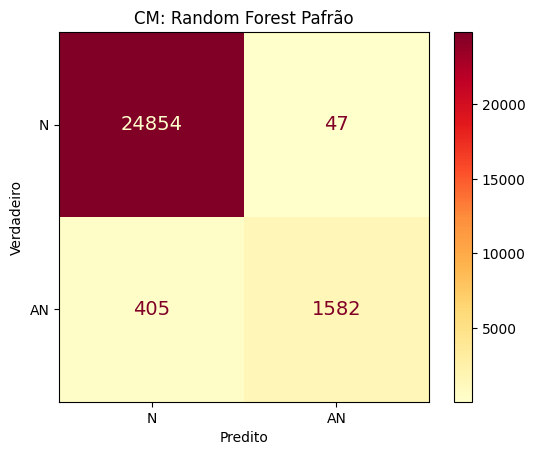

--- Métricas de Desempenho ---
Accuracy: 98.32%
Recall: 79.62%
ROC: 0.8971
F1-Score: 0.8750
Precision: 97.11%
Specificity: 99.81%
------------------------------


In [8]:
v1_carregado = joblib.load('../models/ramdon_forest_v1.pkl')

previsao_v1 = v1_carregado.predict(x_test)

from src.models.evaluate_model import evaluate_model
evaluate_model(y_binary_test, previsao_v1, "CM: Random Forest Pafrão")

## Melhores parâmetros

In [4]:
random_forest = RandomForestClassifier()

param_grid = {
    'criterion': ['entropy'],
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2', 0.1],
    'max_depth': [16, 32, None], 
    # 'min_samples_leaf': [1, 10, 25]
}

grid = GridSearchCV(random_forest, param_grid, cv=5, scoring='recall', n_jobs=-1)

grid.fit(x_train, y_binary_train)

print("Melhores parâmetros: ", grid.best_params_)
print("Melhor sensibilidade: ", grid.best_score_)

caminho_melhor_modelo_v1 = '../models/melhor_random_forest_v1.pkl'
joblib.dump(grid.best_estimator_, caminho_melhor_modelo_v1)

print(f"O melhor modelo foi salvo em {caminho_melhor_modelo_v1}.")

Melhores parâmetros:  {'criterion': 'entropy', 'max_depth': None, 'max_features': 0.1, 'n_estimators': 300}
Melhor sensibilidade:  0.7905556020533422
O melhor modelo foi salvo em ../models/melhor_random_forest_v1.pkl.


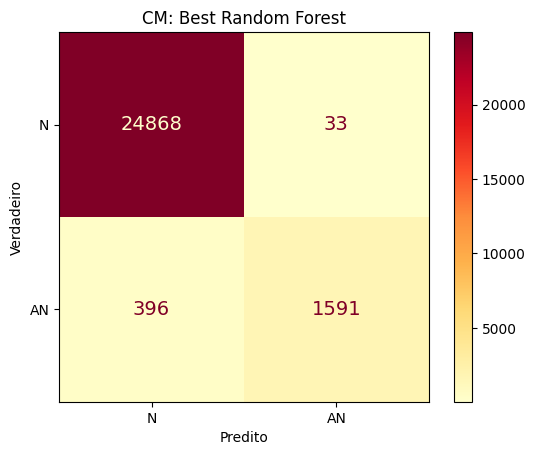

--- Métricas de Desempenho ---
Accuracy: 98.40%
Recall: 80.07%
ROC: 0.8997
F1-Score: 0.8812
Precision: 97.97%
Specificity: 99.87%
------------------------------


In [5]:
# Avaliar melhor modelo
from src.models.evaluate_model import evaluate_model

caminho_melhor_modelo_v1 = '../models/melhor_random_forest_v1.pkl'

melhor_modelo_v1 = joblib.load(caminho_melhor_modelo_v1)

previsao_melhor_modelo_v1 = melhor_modelo_v1.predict(x_test)

evaluate_model(y_binary_test, previsao_melhor_modelo_v1, "CM: Best Random Forest")

# Separar o numero de estimadores e plotar o recall
# gradientBoosting xgBoosting